# Demonstration of content_analysis_tools.py
Say we have the following tagged transcript:
>P1: I think what's bad about the current exam is that we do not have enough time, and that examiners can individually differ in their judgment #weak-aspect.time.subjectivity{this relates to previous work by blabla..}
>
>P2: I think it's good that we look at the overall performance of candidates, but I think the exam duration is too short. #strong-aspect.overall-image #weak-aspect.time
>
>P2: I would like to have eye trackers so we know what the participants are looking at. #suggestion.gaze-recordings
>
>P3: I would like to have eye trackers and video data #suggestion.gaze-recordings.video
>
>P3: Again I want to emphasize that I could really use video data #suggestion.video

## Finding tags and storing them in a dataframe
We want to create a dataframe containing the tag stems (for example #weak-aspect), the suffixes (for example .time), and the comments {between curly brackets}.

To achieve this, we use the following regular expression:

`(#[\w|\-]+)(\.[\w|\-|.]+)?({[^}]+})?`

For an interactive demonstration of this regular expression, see https://regex101.com/r/WvrPav/3

A schematic of the expression created using https://www.debuggex.com/:

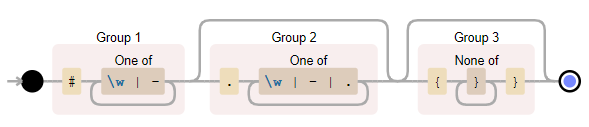


* group 1 = tag stem, for example #weak-aspect
* group 2 = suffixes, for example .time.subjectivity
* group 3 = comments, for example {this examiner gives elaborate answers}

## Who said what
Also, we want to know which participant the tag belongs to. We do this by searching the text backwards, starting from the tag, until we encounter a participant number. We assume participant numbers are denoted with the following pattern: `P(\d+):`, for example, the string `P11:` should be captured.


## Demonstration

For the code, see `content_analysis_tools.py`

As a demonstration, I load a mockup interview below:



In [10]:
from content_analysis_tools import Content

interview_path = 'demo-interview.docx'

interview = Content(interview_path) # alternatively, a string can be loaded directly (instead of a docx path). 

The document is converted to a string, which is stored in the instance `Content.text`

In [2]:
print(interview.text)

P1: I think what's bad about the current exam is that we do not have enough time, and that examiners can individually differ in their judgment #weak-aspect.time.subjectivity{this is a nice quote}
P2: I think it's good that we look at the overall performance of candidates, but I think the exam duration is too short. #strong-aspect.overall-image #weak-aspect.time
P2: I would like to have eye trackers so we know what the participants are looking at. #suggestion.gaze-recordings
P3: I would like to have eye trackers and video data #suggestion.gaze-recordings.video
P3: Again I want to emphasize that I could really use video data #suggestion.video



The interview is read and tags were extracted automatically. The dataframe with all tags can be accessed as follows

In [3]:
interview.data

,stem,suffixes,comments,participant
0,#weak-aspect,"[time, subjectivity]",{this is a nice quote},1
1,#strong-aspect,[overall-image],,2
2,#weak-aspect,[time],,2
3,#suggestion,[gaze-recordings],,2
4,#suggestion,"[gaze-recordings, video]",,3
5,#suggestion,[video],,3


We can count the stems, and how many participants mentioned this stem (avoiding counting participants twice, if they raised the same topic twice), and which participant first mentioned this tag. 

In [4]:
interview.count_stems()

,stem count,stem count unique,first occurence
#suggestion,3,2,2
#weak-aspect,2,2,1
#strong-aspect,1,1,2


And if we specify a tag stem, we can count the suffixes that belong to this stem

In [5]:
interview.count_suffixes("#strong-aspect")

overall-image    1
Name: counted values, dtype: int64

In [6]:
interview.count_suffixes("#weak-aspect")

time            2
subjectivity    1
Name: counted values, dtype: int64

In [7]:
interview.count_suffixes("#suggestion")

gaze-recordings    2
video              1
Name: counted values, dtype: int64

By default, `count_suffixes` avoids double counting suffixes that were raised twice by the same participant. This can be disabled by passing the argument `avoid_double_counting = False`. In our example, P3 mentioned twice that video recordings are preferred. Note this second mention was ignored in the example above.

In [8]:
interview.count_suffixes("#suggestion", avoid_double_counting=False)

video              2
gaze-recordings    2
Name: counted values, dtype: int64